<center>Tópicos selectos de análisis de datos<center>
<center>Tarea 5<center>
<center>Para entregar el 3 de noviembre de 2021<center>

1. Este ejercicio es sobre word embeddings con el modelo neuronal de lenguaje que vimos según la propuesta de Mikolov et al. Puedes entregar la respuesta en un PDF anexo si gustas.

    Considera el modelo skip-gram de `word2vec`, donde la predicción de la palabra $w_j$ dada cierta palabra pivote (input) $w_i$ se calcula usando softmax:
    $$
    \hat{y}_j = P(w_j|w_i) = \frac{\exp(\mathbf{u}_{w_j}'\mathbf{v}_{w_i})}{\sum_{v=1}^V \exp(\mathbf{u}_{w_v}' \mathbf{v}_{w_i})}
    $$

    En esta expresión, $\mathbf{v}_w$ y $\mathbf{u}_w$ son dos representaciones vectoriales de una palabra $w$, dadas por los pesos $\text{input}\rightarrow \text{hidden}$ $\mathbf{W}_{V\times N}$ y $\text{hidden}\rightarrow \text{output}$ $\mathbf{U}_{N\times V}$, respectívamente. $V$ es el tamaño del vocabulario y $N$ representa el tamaño del embedding.

    Suponiendo que los parámetros (embeddings) se obtienen minimizando cross-entropy:
    $$
    L(\mathbf{y},\hat{\mathbf{y}})=-\sum_{v\in V} y_v \log(\hat{y}_v),
    $$
    donde $\mathbf{y}$ es un vector 'one-hot encoding' y $\hat{\mathbf{y}}$ son las predicciones usando softmax.

    a) Muestra que el gradiente respecto a $\mathbf{v}_{w_i}$ representa el error de predicción (pesado) de la capa de salida, es decir:

    $$ 
            \frac{\partial L}{\partial \mathbf{v}_{w_i}} = \mathbf{U}(\hat{\mathbf{y}}-\mathbf{y}),
    $$
    donde $\mathbf{U}=(\mathbf{u}_1,\mathbf{u}_2,\ldots,\mathbf{u}_V)$ es la matriz de todos los vectores de salida. 
        
    b) Muestra que el gradiente de los vectores de salida $\mathbf{u}_{w_t}$'s (incluyendo $\mathbf{u}_{w_j}$) representa (nuevamente) el error de predicción con diferente peso:
    $$ 
            \frac{\partial L}{\partial \mathbf{U}} = \mathbf{v}_{w_i}(\hat{\mathbf{y}}-\mathbf{y})',
    $$

    c) Repite los dos incisos anteriores pero ahora considerando que usas la función de costo con muestreo negativo, es decir: 
    $$
        L(\mathbf{v}_{w_i}, \mathbf{u}_{w_j})=-\log(\sigma(\mathbf{u}_{w_j}'\mathbf{v}_{w_i}))- \sum_{k=1}^K \log(\sigma(-\mathbf{u}_{w_k}'\mathbf{v}_{w_i})),
    $$
    con $\sigma(\cdot)$ la función sigmoide. (Observa que la expresión anterior es la función de costo para SGNS de Mikolov que vimos en clase, pero con signo negativo, ya que queremos minimizarla)

    d) Explica porqué ésta función de costo es mucho más eficiente que usar la función softmax con Cross-Entropy.

<font color=red>Solución: </font>

Inciso a)

Partimos de lo siguiente: 
$$\frac{\partial L}{\partial \mathbf{v}_{w_i}} = \mathbf{U}(\hat{\mathbf{y}}-\mathbf{y})$$ y $$z_j = U_{w_j}^tV_{w_j} $$
así
$$\frac{\partial L}{\partial \mathbf{v}_{w_i}} = \sum_{v\in V} \frac{\partial L}{\partial \mathbf{z}_{v}} \frac{\partial z_v}{\partial \mathbf{v}_{w_i}}  = \sum_{v \in V}(\hat{y_v}-y_v)u_{w_i} = U(\hat{y} - y).$$

Algunas partes se agregaron como resultado de la tarea 1.

Inciso b)

Partimos de los siguiente:\
$$ \frac{\partial L}{\partial \mathbf U} = \frac{\partial L}{\partial \mathbf{z}_{j}} \frac{\partial z_j}{\partial \mathbf{U}} = (\hat{y} - y)V^t_{w_i} = V_{w_i}(\hat{y} - y)^t.$$

Inciso c)

Dada la expresión vamos a realizar lo siguiente:
 $$
 L(\mathbf{v}_{w_i}, \mathbf{u}_{w_j})=-\log(\sigma(\mathbf{u}_{w_j}'\mathbf{v}_{w_i}))- \sum_{k=1}^K \log(\sigma(-\mathbf{u}_{w_k}'\mathbf{v}_{w_i})),
 $$
Vamos a tener como: $L' = -(1-\sigma(g))g' - \sum_{k=1}^K(1-\sigma(g))g'$; donde $g = -\mathbf{u}_{w_j}'\mathbf{v}_{w_i}$, obserque que al derivar la función g se tienen: $g' = \frac{\partial g}{\partial \mathbf v_{w_i}}$ y $g' = \frac{\partial g}{\partial \mathbf u_{w_j}}$, la última derivada tiene dos posibles casos, donde la palabra está o no en el contexto, por lo que se tiene que $g' = \frac{\partial g}{\partial \mathbf u_{w_{j=j}}} = v_{w_i}$ y $g' = \frac{\partial g}{\partial \mathbf u_{w_{j \neq j}}} = 0$.

Una vez que hemos observado las derivadas y los posibles casos vamos a continuar:

i) Caso donde $K=j$, $$L' = ( \sigma( u'_{w_j}v_{w_i} -1)g' + \sum_{k=1}^K( \sigma(u'_{w_k}v_{w_i}) -1) )g'$$

$$
\frac{\partial L}{\partial \mathbf v_{w_i}} = \sum_{k=1}^{k-1}( \sigma(u'_{w_k}v_{w_i}) -1)u'_{w_j}
$$

$$
\frac{\partial L}{\partial \mathbf u'_{w_j}} = ( \sigma( u'_{w_j}v_{w_i} ) -1)v_{w_i}
$$


ii) Caso donde $K \neq j$, $$L' = ( \sigma( u'_{w_j}v_{w_i} -1)g' + \sum_{k=1}^K( \sigma(u'_{w_k}v_{w_i}) -1) )g'$$

$$
\frac{\partial L}{\partial \mathbf v_{w_i}} = \sum_{k=1}^{k-1}( \sigma(u'_{w_k}v_{w_i}))u'_{w_j}
$$

$$
\frac{\partial L}{\partial \mathbf u'_{w_j}} = ( \sigma( u'_{w_j}v_{w_i} ))v_{w_i}
$$

Inciso d)

Se observa que dada esta función de costo es más eficiente ya que reduce el problema multinomial a uno binario. 

## Ejercicio 2

2. Considera el corpus `hispablogs.zip` (Rangel et al., 2017. https://arxiv.org/abs/1705.10754), que contiene una recopilación de blogs para los países de habla hispana Argentina (ar), Chile (cl), España (es), México (mx) y Perú (pe). Puedes usar el siguiente código para leer los archivos train y test:

In [54]:
### En la siguiente linea de código hay que prestar atención cuando se corra
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [55]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import os
#from my_functions3 import *
#os.getcwd()

In [56]:
import os
import re
#os.chdir('/home/victor/cursos/optativa2021/')
os.chdir('/content/drive/MyDrive/Tarea5-CDII/')
#os.chdir('C:\\Users\\Marcelo Sanchez\\OneDrive\\Escritorio\\Tercer Semestre CIMAT\\Temas Ciencia de Datos II\\Tareas\\Tarea_5')

def get_texts_from_dir(cat_dir):
    texts = []
    data_dir = cat_dir
    category_index = {}
    categories = []
    for category_name in sorted(os.listdir(data_dir)):
        category_id = len(category_index)
        category_index[category_name] = category_id
        category_path = os.path.join(data_dir, category_name)
        for f_name in sorted(os.listdir(category_path)):
            f_path = os.path.join(category_path, f_name)
            f = open(f_path, "r", encoding="utf8")
            texts += [f.read()]                
            f.close()
            categories += [category_id]
    print("%d files loaded from %s" % (len(texts), cat_dir))
    return texts, categories, category_index

# Load the RAW text and Category labels
#tr_txt, tr_y, tr_y_ind = get_texts_from_dir("data/hispablogs/train")
#te_txt, te_y, te_y_ind = get_texts_from_dir("data/hispablogs/test")

tr_txt, tr_y, tr_y_ind = get_texts_from_dir("data/train")
te_txt, te_y, te_y_ind = get_texts_from_dir("data/test")

2250 files loaded from data/train
1000 files loaded from data/test


In [57]:
tr_y_ind

{'ar': 0, 'cl': 1, 'es': 2, 'mx': 3, 'pe': 4}

In [58]:
len(te_txt)

1000

puedes usar éste código para crear una bolsa de palabras

In [ ]:
from keras.preprocessing.text import Tokenizer
# Contruir tokenizador y vocabulario
n_words = 20000
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes
tokenizer.fit_on_texts(tr_txt) 

# word_index contiene un diccionario con el vocabulario y sus indices en orden ascendente de acuerdo a su frecuencia
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_counts = tokenizer.word_counts

Found 233933 unique tokens.


In [ ]:
query_w = 'tortilla'
print("Frequency of \"%s\" is %s" % (query_w, word_counts[query_w]))

Frequency of "tortilla" is 55


In [ ]:
# con esta instruccion se crea la bolsa de palabras, por ejemplo, para los textos de train:
BOW_train=tokenizer.texts_to_matrix(tr_txt, mode="count")
BOW_train.shape

(2250, 20000)

    a) Representa con una nube de palabras, las palabras más frecuentes usadas en cada país.

Se agregaron las siguientes lineas como evidencia para obtener las nubes de cada uno de los paises pero por cuestiones de errores no se pudo agregar completamente al archivo.

In [ ]:
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=True,
                                _remueveStop=True, _stemming=False, _lematiza=True, _removerPuntuacion=True)

In [ ]:
corpus_prep = []
for txt in tr_txt:
    txt_prep = preprocesador.preprocesa(txt)
    corpus_prep.append(txt_prep)

In [ ]:
corpus_prep_2 = []
for txt in te_txt:
    txt_prep = preprocesador.preprocesa(txt)
    corpus_prep_2.append(txt_prep)

In [ ]:
import pandas as pd

exp_2 = pd.DataFrame(corpus_prep_2)
exp_2['cl'] = te_y
exp_2.columns = ['Corpus', 'cl']
exp_2

,Corpus,cl
0,dgcye informo noviembre abonarar haber docente...,0
1,articulosrelacionado airbag peatón volvo airba...,0
2,piloto chevrolet agustin canapino consiguio ho...,0
3,hacer tiempo proponer asociar imagen vi este p...,0
4,titulo cellular and molecular inmunology autor...,0
...,...,...
995,fotoselectascom presentar coleccion fotografia...,4
996,bien indicar contenido video powert point dida...,4
997,aqui palomafiuzar bailar sexy evento realizado...,4
998,lugar guerrero hijo sol pequeño princesa vesti...,4


In [ ]:
corpus_te = exp_2.Corpus.values
te_cl = exp_2.cl.values

In [ ]:
exp_1 = pd.DataFrame(corpus_prep)
exp_1['cl'] = tr_y
exp_1.columns = ['Corpus', 'cl']
exp_1

,Corpus,cl
0,brother wherir art thou significo exito basado...,0
1,ciudad ushuaia amanecio ayer viernes cubierto ...,0
2,bahio noticiasecologio peligro nuevo catastrof...,0
3,tomemo concienciatecnologia avanzadasin pensam...,0
4,compatriotasya duda acerca grande medio escrib...,0
...,...,...
2245,poder considerar obra emblematica arquitectura...,4
2246,hector huerto vizcarrael tema plantear jorobad...,4
2247,presidente parlamento andino wilbert bendezu e...,4
2248,siguiente modelo realizado betsabe sanchez pro...,4


In [ ]:
CurrentPath = os.getcwd()
CurrentPath

'C:\\Users\\Marcelo Sanchez\\OneDrive\\Escritorio\\Tercer Semestre CIMAT\\Temas Ciencia de Datos II\\Tareas\\Tarea_5'

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from ipywidgets import interact

def Jordan(Corpus,name,maxword=80):
    prep = " ".join(review for review in Corpus)
    my_stopwords=set(STOPWORDS)
    # agregamos algunas palabras que no nos ayudan mucho al realizar la nube de palabras, estas las 
    # fuimos obteniendo al momento de ejecutar el código
    my_stopwords.update(['asi','año','solo','si','él','decir','hacer','poder','mismo','ser','ir','ver','dar',
                        'nuevo','primero','tiempo','dos','todo','bien','tanto'])
    cloudtxt=WordCloud(stopwords=my_stopwords, max_words=maxword).generate(prep)
    plt.figure(figsize=(10,10))
    plt.imshow(cloudtxt,interpolation='bilinear')
    plt.axis('off')
    plt.show()

def Kobe(x):
    if x=='Argentina':
        cl=0
    elif x=='Chile':
        cl=1
    elif x=='España':
        cl=2
    elif x=='México':
        cl=3
    elif x=='Perú':
        cl=4

    filtered = exp_2[exp_2.cl==cl]    
    Corpus=filtered['Corpus'].values #textos
    Jordan(Corpus,x)

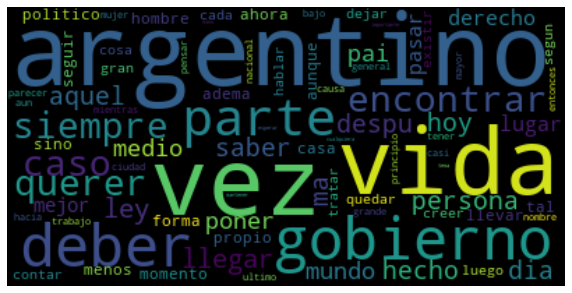

In [ ]:
kobe('Argentina')

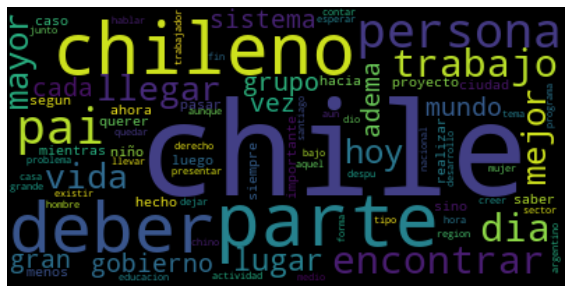

In [ ]:
kobe('Chile')

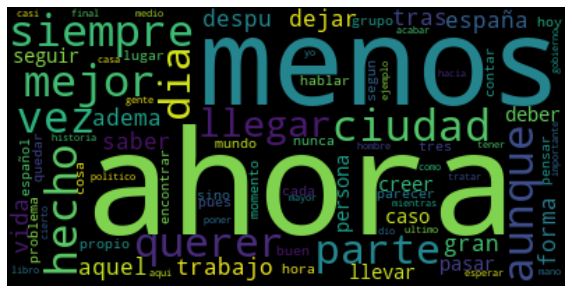

In [ ]:
kobe('España')

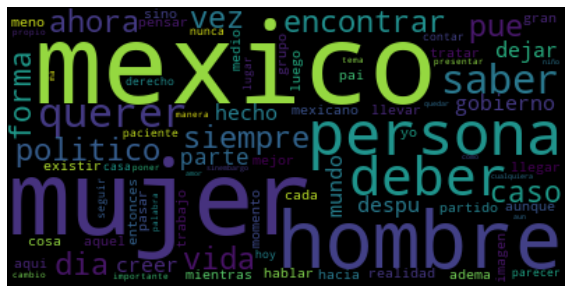

In [ ]:
kobe('México')

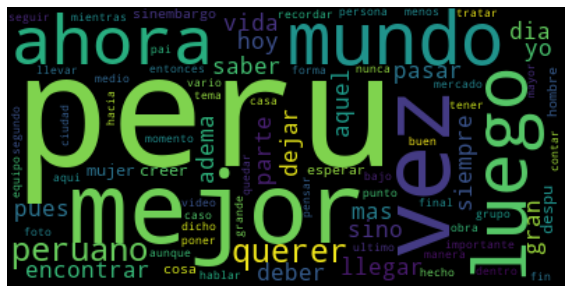

In [ ]:
kobe('Perú')

    b) Crea un baseline tomando un clasificador SVM lineal basado en la bolsa de palabras. Reporta tus resultados en las métricas que ya conoces (no solo precisión...)

In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 28 22:10:50 2020

@author: victor
"""
# ejecutar estas lineas si no esta instalado
#pip install spacy
#python -m spacy download es_core_news_sm
#python -m spacy download es_core_news_sm


# en colab
#!pip install spacy
#!python -m spacy download es_core_news_sm
#!python -m spacy download es_core_news_sm

### Librerias
import os
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
englishStemm=SnowballStemmer("english").stem
spanishStemm=SnowballStemmer("spanish").stem
#import spacy
#sp_es = spacy.load('es_core_news_sm')
#sp_en = spacy.load('en_core_web_sm')

#import pattern
#from pattern.es import lemma as spanishlemma
#from pattern.en import lemma as englishlemma

nltk.download('stopwords')
from nltk.corpus import stopwords
stopEnglish=set(stopwords.words('english'))
stopSpanish=set(stopwords.words('spanish'))
#stopSpanish

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def listdir_fullpath(d):
    return [os.path.join(d, f) for f in sorted_alphanumeric(os.listdir(d))]


class preprocesaTexto():    
    def __init__(self, idioma,_tokeniza=False,_aMinusculas=True,
                 _aMayusculas=False,_removerPuntuacion=True,_removerCaracteresRaros=True,
                 _quitarNumeros=True,_lematiza=False,_stemming=False,_quitarAcentos=False,
                 _remueveStop=False,_muestraCambios=False):
        
        
        ''' Clase elaborada por Angel Domínguez Lozano (angel.dominguez@cimat.mx), para la clase NLP 
            en CIMAT Monterrey.
            Modificada por Victor M (agregar spacy para lematización).
          La clase toma como parametro obligatorio el idioma a utilizar, con solo dos opciones
           'es' para español y 'en' para ingles.
      
          Se tienen las siguientes caracteristicas para preprocesar texto
            tokeniza: Devuelve una lista con el texto divido en tokens
            aMinusculas: Convierte cada letra mayuscula a minuscula
            aMayusculas: Convierte cada letra minuscula a mayuscula
            removerPuntuacion: Remueve los signos de puntuacion
            quitarNumeros: Remueve los numeros del texto
            lematiza: Regresa el texto con cada palabra lematizada
            stemming: Regresa el texto realizando stemming a cada palabra
            quitarAcentos: En el idioma español, sustituye letras con acentos por su correspondiente sin acento
            remueveStop: Remueve las stop words segun el idioma en cuestion
          Cada una de las funciones anteriores cuenta con su correpondiente parametro binario
            _tokeniza,_aMinusculas,_aMayusculas,_removerPuntuacion,_quitarNumeros
            _lematiza,_stemming,_quitarAcentos,_remueveStop
          que tienen la funcion de servir como auxiliaron para la funcion principal
            preprocesa, funcion que realiza sobre un texto dado todos los preprocesos con
            variable auxiliar activa. En caso de que _muestraCambios este activo,
            ademas se imprimira la transformacion del texto despues de cada paso.

          El default de las variables auxiliares es no tokenizar, convertir a minusculas
          , remover puntuacion, remover caracteres raros, quitar numeros, no lematizar,
          no hacer stemming, no quitar acentos, no quitar stop words y no mostrar los cambios.
      '''
        self.idioma=idioma
        self._tokeniza=_tokeniza
        self._aMinusculas=_aMinusculas
        self._aMayusculas=_aMayusculas
        self._removerPuntuacion=_removerPuntuacion
        self._removerCaracteresRaros=_removerCaracteresRaros
        self._quitarNumeros=_quitarNumeros
        self._lematiza=_lematiza
        self._stemming=_stemming
        self._quitarAcentos =_quitarAcentos
        self._remueveStop =_remueveStop
        self._muestraCambios=_muestraCambios
    """ codigo... """ 
    def tokeniza(self,texto):
      return word_tokenize(texto)

    def aMinusculas(self,texto):
      if self.idioma== 'es':
        ans=""
        for c in texto:
          if c=='Á' : c='á'
          if c=='É' : c='é'
          if c=='Í' : c='í'
          if c=='Ó' : c='ó'
          if c=='Ú' : c='ú'
          if c=='Ñ' : c='ñ'
          if c=='Ü' : c='ü'
          ans+=c
        return ans.lower()
      else :
        return texto.lower()

    def aMayusculas(self,texto):
      if self.idioma == 'es':
        ans=""
        for c in texto:
          if c=='á' : c='Á'
          if c=='é' : c='É'
          if c=='í' : c='Í'
          if c=='ó' : c='Ó'
          if c=='ú' : c='Ú'
          if c=='ñ' : c='Ñ'
          if c=='ü' : c='Ü'
          ans+=c
        return ans.upper()
      else :
        return texto.upper()

    def quitarAcentos(self,texto):
      if self.idioma == 'es':
        ans=""
        for c in texto:
          if c=='á' : c='a'
          if c=='é' : c='e'
          if c=='í' : c='i'
          if c=='ó' : c='o'
          if c=='ú' : c='u'
          if c=='Á' : c='A'
          if c=='É' : c='E'
          if c=='Í' : c='I'
          if c=='Ó' : c='O'
          if c=='Ú' : c='U'
          ans+=c
        return ans
      else :
        return texto

    def removerPuntuacion(self,texto):
      puntuacion=string.punctuation
      if self.idioma=='es': 
        puntuacion+="¡¿"
      temp=""
      for c in texto:
        if not c in puntuacion:
          temp+=c
      return temp

    def removerCaracteresRaros(self,texto):
      buenos=string.printable
      if self.idioma=='es': 
        buenos+="¡¿áéíóúÁÉÍÓÚÑñÜü"
      temp=""
      for c in texto:
        if c in buenos:
          temp+=c
      return temp

    def quitarNumeros(self,texto):
      temp=""
      for c in texto:
        if not c.isdigit():
          temp+=c
      return temp

    def lematiza(self,texto):
      temp=[]
      if self.idioma== 'es':
        doc = sp_es(texto)
        for token in doc:
          temp.append(token.lemma_)
          temp.append(" ")
      else :
        doc = sp_en(texto)
        for token in doc:
          temp.append(token.lemma_)
          temp.append(" ")
      return "".join(temp)

    def stemming(self,texto):
      palabras=word_tokenize(texto)
      temp=[]
      if self.idioma== 'es':
        for pal in palabras:
          temp.append(spanishStemm(pal))
          temp.append(" ")
      else :
        for pal in palabras:
          temp.append(englishStemm(pal))
          temp.append(" ")
      return "".join(temp)

    def remueveStop(self,texto):
      palabras=word_tokenize(texto)
      temp=[]
      if self.idioma== 'es':
        for pal in palabras:
          if pal not in stopSpanish:
            temp.append(pal)
            temp.append(" ")
      else :
        for pal in palabras:
          if pal not in stopEnglish:
            temp.append(pal)
            temp.append(" ")
      return "".join(temp)

    def preprocesa(self,texto):
      ans=texto
      if self._muestraCambios : print("Inicial:\n", ans)
      if self._removerCaracteresRaros : 
        ans=self.removerCaracteresRaros(ans)
        if self._muestraCambios : print("Quitando caracteres raros:\n", ans)
      if self._removerPuntuacion : 
        ans=self.removerPuntuacion(ans)
        if self._muestraCambios :print("Quitando signos de puntuacion:\n", ans)
      if self._quitarNumeros : 
        ans=self.quitarNumeros(ans)
        if self._muestraCambios : print("Quitando numeros:\n", ans)
      if self._aMinusculas : 
        ans=self.aMinusculas(ans)
        if self._muestraCambios : print("Convirtiendo a minusculas:\n", ans)  
      if self._aMayusculas : 
        ans=self.aMayusculas(ans)
        if self._muestraCambios : print("Convirtiendo a mayusculas:\n", ans)
      if self._remueveStop : 
        ans=self.remueveStop(ans)
        if self._muestraCambios : print("Quitando stop words:\n", ans)
      if self._quitarAcentos : 
        ans=self.quitarAcentos(ans)
        if self._muestraCambios : print("Quitando acentos:\n", ans)
      if self._lematiza : 
        ans=self.lematiza(ans)
        if self._muestraCambios : print("Lematizando:\n", ans)
      if self._stemming : 
        ans=self.stemming(ans)
        if self._muestraCambios : print("Stemming:\n", ans)
      if self._tokeniza : 
        ans=self.tokeniza(ans)
        if self._muestraCambios : print("Tokenizando:\n", ans)
      if self._muestraCambios : print("Final:\n", ans)
      return ans 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
pala_malas = [' asi ',' año ',' solo ',' si ',' él ',' decir ',' hacer ',' poder ',' mismo ',' ser ',' ir ',' ver ',' dar ',
                    ' nuevo ',' primero ',' tiempo ',' dos ',' todo ',' bien ',' tanto ', ' \n ', ' _ ']

preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=True,
                                _remueveStop=True, _stemming=False, _lematiza=False, _removerPuntuacion=True)

In [124]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

en_stop = set(nltk.corpus.stopwords.words('spanish'))
en_stop.update(pala_malas)

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        #tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]
        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [125]:
# En la siguientes lineas de código lo que realizamos fue eliminar estás palabaras que identificamos como malas
#  aquí se realizo para el conjunto de entrenamiento.
corpus_prep = []
for txt in tr_txt:
    txt_prep = preprocesador.preprocesa(preprocess_text(txt))
    corpus_prep.append(txt_prep)

In [126]:
#  aquí se realizo para el conjunto de prueba.
corpus_prep_2 = []
for txt in te_txt:
    txt_prep = preprocesador.preprocesa(preprocess_text(txt))
    corpus_prep_2.append(txt_prep)

In [127]:
#import tensorflow 
from keras.preprocessing.text import Tokenizer

max_words = 20000
tokenizer = Tokenizer(num_words=max_words+1)
tokenizer.fit_on_texts(l_corpus_prep) #l_corpus_prep
# vectorizacion (one-hot u otro)
X_train = tokenizer.texts_to_matrix(l_corpus_prep, mode='count') #"binary", count", "tfidf", "freq"
X_test = tokenizer.texts_to_matrix(l_corpus_prep_2, mode='count') #"binary", count", "tfidf", "freq"

### Realizamos nuestros primeros modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support vector classifier
from sklearn import metrics

#tr_y
#te_y
#X_train
#cos_sim2 = cosine_similarity(X_test, X_test)

svm = SVC(kernel='linear', C=2.1, tol=1e-2, cache_size=100)
svm.fit(X_train, tr_y)
y_pred = svm.predict(X_test)
print(metrics.classification_report(te_y, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.33      0.45       200
           1       0.29      0.94      0.44       200
           2       0.76      0.42      0.54       200
           3       0.75      0.28      0.41       200
           4       0.79      0.28      0.41       200

    accuracy                           0.45      1000
   macro avg       0.67      0.45      0.45      1000
weighted avg       0.67      0.45      0.45      1000



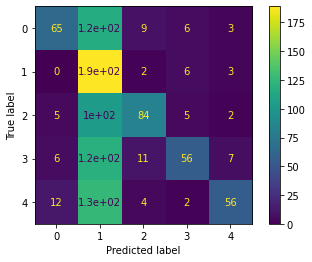

In [ ]:
cm = metrics.confusion_matrix(te_y, y_pred, labels=svm.classes_, normalize = None)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

#plt.show()

    c) Implementa clasificadores basados en
        - SVM con TF-IDF
        - Redes convolucionales
        - Redes LSTM o GRU

        Haz un breve reporte comparando los resultados, elige el mejor método y explica porqué. Especifica TODOS los parámetros que usaste en tus métodos (número de capas y unidades ocultas, longitud de secuencia, padding, regularización, etc). Usa una capa de embeddings con y sin transfer learning usando pesos pre-entrenados para español, verifica si los resultados son diferentes y elige cuál embedding prefieres y porqué. Para transfer learning, puedes usar `word2vec`, `gloVe` o `fastText`. Puedes buscar embeddings en español en los sitios oficiales de los métodos, o en éste sitio: https://github.com/dccuchile/spanish-word-embeddings.

### Implementación de clasificador basado en SVM con TF-IDF

In [128]:
from keras.preprocessing.text import Tokenizer

max_words = 20000 #20000
tokenizer = Tokenizer(num_words=max_words+1)
tokenizer.fit_on_texts(l_corpus_prep) #l_corpus_prep
# vectorizacion (one-hot u otro)
X_train = tokenizer.texts_to_matrix(corpus_prep, mode='tfidf') #"binary", count", "tfidf", "freq"
X_test = tokenizer.texts_to_matrix(corpus_prep_2, mode='tfidf') #"binary", count", "tfidf", "freq"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support vector classifier
from sklearn import metrics

svm = SVC(kernel='linear', C=2.1, tol=1e-2, cache_size=100)
svm.fit(X_train, tr_y)
y_pred = svm.predict(X_test)
print(metrics.classification_report(te_y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.24      0.37       200
           1       0.26      0.94      0.40       200
           2       0.84      0.35      0.49       200
           3       0.64      0.23      0.34       200
           4       0.81      0.23      0.36       200

    accuracy                           0.40      1000
   macro avg       0.67      0.40      0.40      1000
weighted avg       0.67      0.40      0.40      1000



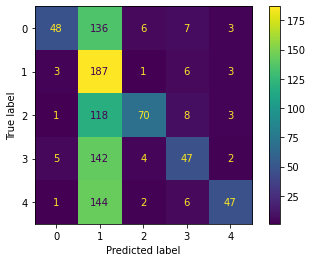

In [ ]:
cm = metrics.confusion_matrix(te_y, y_pred, labels=svm.classes_, normalize = None)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

### Implementación de clasificador basado en Redes convolucionales

En las siguientes lineas realizamos varias implementaciones de modelos, en muchos casos se opto por solo tomar cierto número de epocas dado que no se contaba con mucho tiempo.

In [130]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 9500  # cut texts after this number of words (among top max_features most common words)

n_words = 5000
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes
tokenizer.fit_on_texts(corpus_prep) 
X_train=tokenizer.texts_to_sequences(corpus_prep)
X_test=tokenizer.texts_to_sequences(corpus_prep_2)

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(X_train, maxlen=maxlen)
input_test = sequence.pad_sequences(X_test, maxlen=maxlen)

Pad sequences (samples x time)


In [68]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adamax
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM
from keras import layers
from tensorflow.keras.utils import to_categorical

## primer modelo
## recurrente
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
#model.add(Dense(5, activation='sigmoid'))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.add(Dense(5, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 328,485
Trainable params: 328,485
Non-trainable params: 0
________________________________________________

In [138]:
from sklearn.utils import shuffle
### En la siguiente linea revolvemos nuestros datos de entrenamietnto.
input_train,tr_y = shuffle(input_train,tr_y)### lo corrimos una vez 03/11/21, a las 06:58 pm

In [ ]:
## Ejecutamos nuestro primer modelo
history = model.fit(input_train, to_categorical(tr_y),
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 41s 2s/step - loss: 1.6375 - acc: 0.1872 - val_loss: 1.6417 - val_acc: 0.2178
Epoch 2/30
15/15 [==============================] - 37s 2s/step - loss: 1.6174 - acc: 0.1983 - val_loss: 1.6723 - val_acc: 0.2178
Epoch 3/30
15/15 [==============================] - 36s 2s/step - loss: 1.6292 - acc: 0.1806 - val_loss: 1.6210 - val_acc: 0.1844
Epoch 4/30
15/15 [==============================] - 37s 2s/step - loss: 1.6182 - acc: 0.1856 - val_loss: 1.6359 - val_acc: 0.2044
Epoch 5/30
15/15 [==============================] - 35s 2s/step - loss: 1.6177 - acc: 0.1994 - val_loss: 1.6545 - val_acc: 0.2022
Epoch 6/30
15/15 [==============================] - 36s 2s/step - loss: 1.6183 - acc: 0.1906 - val_loss: 1.6161 - val_acc: 0.2178
Epoch 7/30
15/15 [==============================] - 35s 2s/step - loss: 1.6140 - acc: 0.1928 - val_loss: 1.6561 - val_acc: 0.2044
Epoch 8/30
15/15 [==============================] - 34s 2s/step - loss: 1.6188 - acc: 0.19

In [ ]:
import pandas as pd

d = pd.DataFrame(abs(y_pred))
r = d.apply(pd.Series.idxmax, axis=1).values

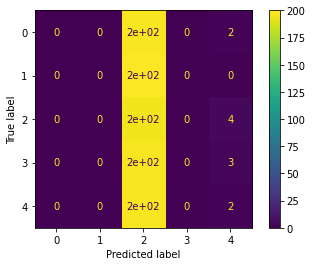

In [ ]:
cm = metrics.confusion_matrix(te_y, r, labels=svm.classes_, normalize = None)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [91]:
#### LSTM, implementamos distintos modelos apartir de aquí

model = Sequential() ### 
model.add(Embedding(max_features, 75))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75))
model.add(Dense(50,activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 75)          750000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 75)          45300     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 75)          45300     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 75)          45300     
_________________________________________________________________
lstm_3 (LSTM)                (None, 75)                45300     
_________________________________________________________________
dense_25 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_26 (Dense)             (None, 5)               

In [92]:
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
 #             metrics=['acc'])
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adamax(learning_rate=1e-3), loss='categorical_crossentropy',  metrics=['acc']) #Adamax

history = model.fit(input_train, to_categorical(tr_y),
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
15/15 [==============================] - 65s 669ms/step - loss: 1.6099 - acc: 0.1889 - val_loss: 1.6097 - val_acc: 0.1867
Epoch 2/15
15/15 [==============================] - 9s 589ms/step - loss: 1.6099 - acc: 0.2033 - val_loss: 1.6108 - val_acc: 0.1867
Epoch 3/15
15/15 [==============================] - 9s 593ms/step - loss: 1.6095 - acc: 0.2033 - val_loss: 1.6102 - val_acc: 0.1867
Epoch 4/15
15/15 [==============================] - 9s 591ms/step - loss: 1.6094 - acc: 0.2033 - val_loss: 1.6105 - val_acc: 0.1867
Epoch 5/15
15/15 [==============================] - 9s 591ms/step - loss: 1.6094 - acc: 0.2033 - val_loss: 1.6111 - val_acc: 0.1867
Epoch 6/15
15/15 [==============================] - 9s 590ms/step - loss: 1.6094 - acc: 0.2033 - val_loss: 1.6107 - val_acc: 0.1867
Epoch 7/15
15/15 [==============================] - 9s 592ms/step - loss: 1.6094 - acc: 0.2033 - val_loss: 1.6108 - val_acc: 0.1867
Epoch 8/15
15/15 [==============================] - 9s 589ms/step - loss: 1

In [93]:
import numpy as np
from sklearn.metrics import classification_report,  confusion_matrix
import pandas as pd

y_pred = model.predict(input_test)

d = pd.DataFrame(abs(y_pred))
r = d.apply(pd.Series.idxmax, axis=1).values

In [94]:
print('mejor modelo:')
print(classification_report(te_y, r))
print()

mejor modelo:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       200
           2       0.00      0.00      0.00       200
           3       0.20      1.00      0.33       200
           4       0.00      0.00      0.00       200

    accuracy                           0.20      1000
   macro avg       0.04      0.20      0.07      1000
weighted avg       0.04      0.20      0.07      1000




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ocupando Transfer learning

En la siguientes lineas hicimos uso de trasnfer learning donde descargamos el archivo llamado wiki.es.vec.

In [ ]:
import os
#from my_functions3 import *
os.getcwd()

'/content/drive/My Drive/Tarea5-CDII'

In [70]:
from gensim.models.keyedvectors import KeyedVectors

#word = 'C:\\Users\\Marcelo Sanchez\\OneDrive\\Escritorio\\Tercer Semestre CIMAT\\Temas Ciencia de Datos II\\Tareas\\Tarea_5\\wiki.es.vec'
word = '/content/drive/MyDrive/Tarea5-CDII/wiki.es.vec'


cantidad = 1000000
wordvectors = KeyedVectors.load_word2vec_format(word, limit=cantidad)

In [136]:
import numpy as np

## realizamos nuestra matriz de embedding
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
words_not_found = []
#nb_words = max_words
nb_words = maxlen
for word, i in word_index.items():
    if i >= nb_words:
        continue
    try:
        embedding_vector = wordvectors.get_vector(word)
        embedding_matrix[i] = embedding_vector
    except:
        words_not_found.append(word)

Ahora ya que realizamos nuestra matriz de embedding vamos a realizar nuestros modelos.

In [110]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index)+1, 300, input_length=maxlen,
        weights=[embedding_matrix], trainable=False))
model.add(SimpleRNN(32, return_sequences=True))
#model.add(Dense(5, activation='sigmoid'))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 2500, 300)         70845600  
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 2500, 32)          10656     
_________________________________________________________________
simple_rnn_26 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_37 (Dense)             (None, 5)                 165       
Total params: 70,858,501
Trainable params: 12,901
Non-trainable params: 70,845,600
_________________________________________________________________


In [111]:
history = model.fit(input_train, to_categorical(tr_y),
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 61s 4s/step - loss: 1.6267 - acc: 0.2033 - val_loss: 1.6500 - val_acc: 0.2267
Epoch 2/10
15/15 [==============================] - 60s 4s/step - loss: 1.6129 - acc: 0.1961 - val_loss: 1.6311 - val_acc: 0.2178
Epoch 3/10
15/15 [==============================] - 60s 4s/step - loss: 1.6088 - acc: 0.2083 - val_loss: 1.6421 - val_acc: 0.1889
Epoch 4/10
15/15 [==============================] - 60s 4s/step - loss: 1.6020 - acc: 0.2267 - val_loss: 1.6290 - val_acc: 0.2000
Epoch 5/10
15/15 [==============================] - 60s 4s/step - loss: 1.6008 - acc: 0.2272 - val_loss: 1.6414 - val_acc: 0.1822
Epoch 6/10
15/15 [==============================] - 60s 4s/step - loss: 1.5909 - acc: 0.2389 - val_loss: 1.6443 - val_acc: 0.2067
Epoch 7/10
15/15 [==============================] - 61s 4s/step - loss: 1.5912 - acc: 0.2461 - val_loss: 1.6438 - val_acc: 0.1844
Epoch 8/10
15/15 [==============================] - 60s 4s/step - loss: 1.5867 - acc: 0.23

In [112]:
import numpy as np
from sklearn.metrics import classification_report,  confusion_matrix
import pandas as pd

y_pred = model.predict(input_test)

d = pd.DataFrame(abs(y_pred))
r = d.apply(pd.Series.idxmax, axis=1).values

In [113]:
print('mejor modelo:')
print(classification_report(te_y, r))
print()

mejor modelo:
              precision    recall  f1-score   support

           0       0.11      0.04      0.05       200
           1       0.18      0.17      0.18       200
           2       0.33      0.04      0.07       200
           3       0.19      0.40      0.25       200
           4       0.20      0.29      0.24       200

    accuracy                           0.19      1000
   macro avg       0.20      0.19      0.16      1000
weighted avg       0.20      0.19      0.16      1000




In [137]:
### Ahora vamos a implementar un nuevo modelo 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index)+1, 300, input_length=maxlen,
        weights=[embedding_matrix], trainable=False))
model.add(SimpleRNN(32, return_sequences=True))
#model.add( layers.Dropout(0.5) )
model.add( layers.Conv1D(200, 15, activation='elu') )
model.add( layers.AveragePooling1D(5) )
#model.add( layers.Dropout(0.5) )
model.add( layers.Conv1D(150, 15, activation='elu') )
model.add( layers.AveragePooling1D(5) )#####
model.add( layers.GlobalMaxPooling1D() )
model.add( layers.Dropout(0.5) )
model.add( layers.Dense(100, activation='elu') )
#model.add( layers.GlobalMaxPooling1D() )
model.add( layers.Dense(5, activation='softmax') )

model.summary()
model.compile(optimizer=optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 2500, 300)         69632100  
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, 2500, 32)          10656     
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 2486, 200)         96200     
_________________________________________________________________
average_pooling1d_26 (Averag (None, 497, 200)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 483, 150)          450150    
_________________________________________________________________
average_pooling1d_27 (Averag (None, 96, 150)           0         
_________________________________________________________________
global_max_pooling1d_20 (Glo (None, 150)             

In [28]:
################################
history = model.fit(input_train, to_categorical(tr_y),
                    epochs=35,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/35
15/15 [==============================] - 141s 9s/step - loss: 1.2883 - acc: 0.4100 - val_loss: 1.5498 - val_acc: 0.3067
Epoch 2/35
15/15 [==============================] - 144s 10s/step - loss: 1.2055 - acc: 0.4150 - val_loss: 1.3048 - val_acc: 0.3556
Epoch 3/35
15/15 [==============================] - 144s 10s/step - loss: 1.2288 - acc: 0.4222 - val_loss: 1.4056 - val_acc: 0.3756
Epoch 4/35
15/15 [==============================] - 142s 9s/step - loss: 1.2246 - acc: 0.4333 - val_loss: 1.5350 - val_acc: 0.3133
Epoch 5/35
15/15 [==============================] - 143s 10s/step - loss: 1.2118 - acc: 0.4189 - val_loss: 1.2456 - val_acc: 0.4133
Epoch 6/35
15/15 [==============================] - 143s 10s/step - loss: 1.2334 - acc: 0.4122 - val_loss: 1.4998 - val_acc: 0.3000
Epoch 7/35
15/15 [==============================] - 144s 10s/step - loss: 1.1948 - acc: 0.4322 - val_loss: 1.4239 - val_acc: 0.3511
Epoch 8/35
15/15 [==============================] - 144s 10s/step - loss: 1.22

In [29]:
test_loss, test_acc = model.evaluate(x=input_test, y=to_categorical(te_y))
print('test acc:', test_acc)

32/32 [==============================] - 18s 570ms/step - loss: 1.7953 - acc: 0.2090
test acc: 0.20900000631809235


In [30]:
import numpy as np
from sklearn.metrics import classification_report,  confusion_matrix
import pandas as pd

y_pred = model.predict(input_test)

d = pd.DataFrame(abs(y_pred))
r = d.apply(pd.Series.idxmax, axis=1).values

In [31]:
print('mejor modelo:')
print(classification_report(te_y, r))
print()

mejor modelo:
              precision    recall  f1-score   support

           0       0.26      0.07      0.10       200
           1       0.20      0.96      0.34       200
           2       0.50      0.01      0.03       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200

    accuracy                           0.21      1000
   macro avg       0.19      0.21      0.09      1000
weighted avg       0.19      0.21      0.09      1000




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
#### Último modelo 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index)+1, 300, input_length=maxlen,
        weights=[embedding_matrix], trainable=False))
model.add(SimpleRNN(32, return_sequences=True))
model.add( layers.Dropout(0.6) )
model.add( layers.Conv1D(32, 15, activation='relu') )
model.add( layers.GlobalMaxPooling1D() )
model.add( layers.Dropout(0.6) )
model.add( layers.Dense(5, activation='softmax') )

model.summary()
model.compile(optimizer=optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 2500, 300)         70845600  
_________________________________________________________________
simple_rnn_27 (SimpleRNN)    (None, 2500, 32)          10656     
_________________________________________________________________
dropout_46 (Dropout)         (None, 2500, 32)          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 2486, 32)          15392     
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 32)                0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)               

In [118]:
history = model.fit(input_train, to_categorical(tr_y),
                    epochs=5,
                    workers=8,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 26s 2s/step - loss: 2.0834 - acc: 0.2033 - val_loss: 1.6217 - val_acc: 0.1733
Epoch 2/5
15/15 [==============================] - 24s 2s/step - loss: 1.7497 - acc: 0.2022 - val_loss: 1.6172 - val_acc: 0.2000
Epoch 3/5
15/15 [==============================] - 24s 2s/step - loss: 1.7037 - acc: 0.2022 - val_loss: 1.6141 - val_acc: 0.2022
Epoch 4/5
15/15 [==============================] - 25s 2s/step - loss: 1.6741 - acc: 0.2100 - val_loss: 1.6113 - val_acc: 0.2044
Epoch 5/5
15/15 [==============================] - 25s 2s/step - loss: 1.6525 - acc: 0.2078 - val_loss: 1.6097 - val_acc: 0.2133


In [75]:
test_loss, test_acc = model.evaluate(x=input_test, y=to_categorical(te_y))
print('test acc:', test_acc)

32/32 [==============================] - 1s 17ms/step - loss: 1.6058 - acc: 0.2080
test acc: 0.20800000429153442


In [77]:
import numpy as np
from sklearn.metrics import classification_report,  confusion_matrix
import pandas as pd

y_pred = model.predict(input_test)

d = pd.DataFrame(abs(y_pred))
r = d.apply(pd.Series.idxmax, axis=1).values

print('mejor modelo:')
print(classification_report(te_y, r))
print()

mejor modelo:
              precision    recall  f1-score   support

           0       0.21      0.49      0.29       200
           1       0.13      0.01      0.02       200
           2       0.21      0.44      0.28       200
           3       0.00      0.00      0.00       200
           4       0.24      0.10      0.14       200

    accuracy                           0.21      1000
   macro avg       0.16      0.21      0.15      1000
weighted avg       0.16      0.21      0.15      1000




Comentarios:

Para realizar la implementación de cada uno de los modelos realizamos una pre proceso a cada conjunto(entrenamiento y prueba), en dicho procesamiento se retiraron ciertas palabras que no tenian mucho sentido tenelas ya que muchas de ellas nos generaron nube de palabras muy raras, también se observo resultados con los datos sin procesar para buscar mejoras en los valores accuracy pero no se logro mucha mejoria.

Las secuencias que se utilizaron para el proceso fueron de una longitud de 10 mil, 9 mil y en otros casos de 3 mil, estos números fueron utilizados para observar que tanto mejoraba el accuracy del conjunto de prueba.

Se observó que, para arquitecturas más complejas tanto de redes convolucionales como recurrentes, se tenía un desempeño peor, ya que se causaba muy rápidamente un sobre ajuste en el conjunto de entrenamiento. Dado nuestros resultados en todos los modelos observamos que no hubo mucha mejoria y puede ser ya que al ocupar transfer learning no se pudieran encontrar ciertas palabras en el conjunto que trae el archivo wiki.es.vec.
Como tarea extra se hubiera podido descargar algún otro archivo y seguir intentando encontrar algunos buenos resultados pero por falta de tiempo no se logro investigar otros archivos, además muchos de ellos tienen un peso grande por lo que al ocupar google colab se pode dificil su descarga.

Dado que ningun modelo utilizando redes convolucionales y redes LSTM no nos dieron buenos resultados vamos a reporte el mejor hasta el momento que fue el clasificador SVM lineal, nos dio un valor de accuracy de 0.45. Este resultado fue superior a todos los demás incluso contra los modelos donde ocupamos capas Max Pooling 1D global, capas de LSTM, aumentando el numero de unidades por cada, etc. Al no lograr un buen resultado se le atribuye al archivo que se implemento para transfer learning.




